In [61]:
pip install yfinance

     -------------------------------------- 59.1/59.1 kB 519.9 kB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 2.2 MB/s eta 0:00:00
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires PyYAML==6.0, but you have pyyaml 3.13 which is incompatible.


In [67]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
msft = yfin.Ticker("MSFT")


In [80]:
df = yfin.download("AAPL", start="2010-01-01", end="2022-12-31")

[*********************100%***********************]  1 of 1 completed


In [81]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515212,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526478,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [85]:
df = df.drop(['Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800


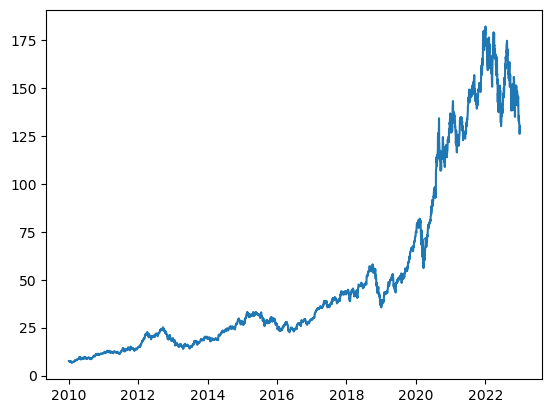

In [86]:
plt.plot(df.Close)

In [87]:
ma100 = df.Close.rolling(30).mean()
ma100

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2022-12-23    143.646999
2022-12-27    142.991332
2022-12-28    142.249999
2022-12-29    141.568999
2022-12-30    140.940333
Name: Close, Length: 3272, dtype: float64

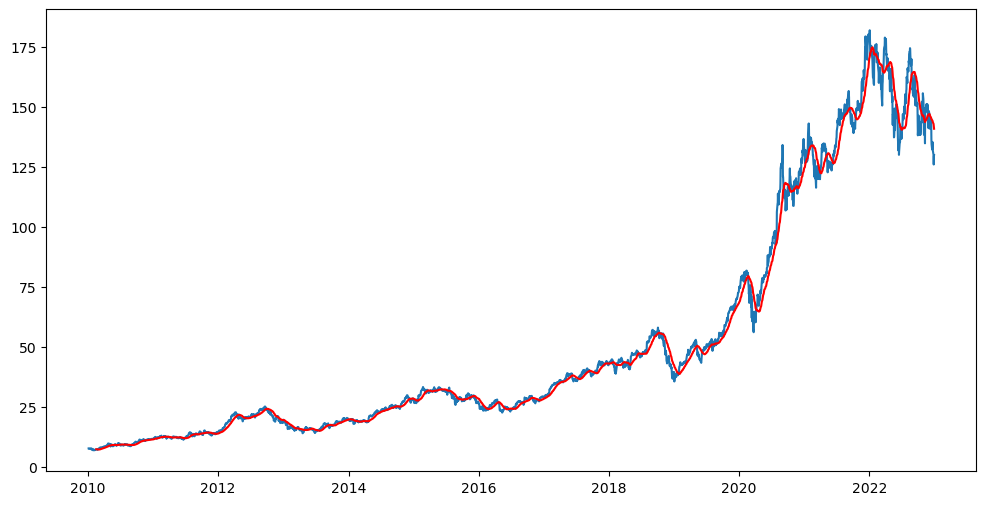

In [88]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [89]:
ma200 = df.Close.rolling(30).mean()
ma200

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2022-12-23    143.646999
2022-12-27    142.991332
2022-12-28    142.249999
2022-12-29    141.568999
2022-12-30    140.940333
Name: Close, Length: 3272, dtype: float64

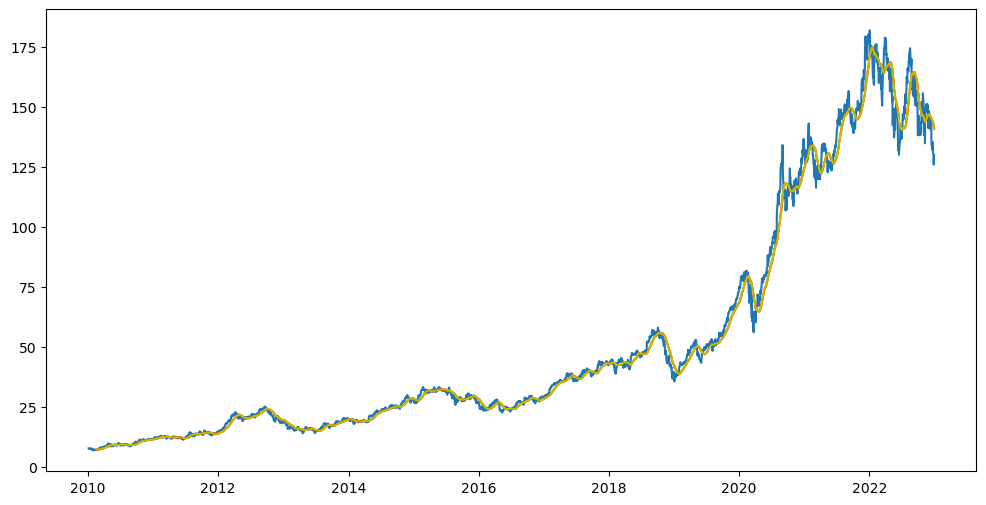

In [90]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'y')

In [91]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2290, 1)
(982, 1)


In [92]:
data_training.head()

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


In [93]:
data_testing.head()

,Close
Date,
2019-02-08,42.602501
2019-02-11,42.357498
2019-02-12,42.722500
2019-02-13,42.544998
2019-02-14,42.700001


In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [95]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [96]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [97]:
x_train.shape

(2190, 100, 1)

In [98]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [100]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
              input_shape = (x_train.shape[1],1 )))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [102]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_9 (LSTM)               (None, 120)              

In [103]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
69/69 [==============================] - 32s 343ms/step - loss: 0.0273
Epoch 2/50
69/69 [==============================] - 24s 348ms/step - loss: 0.0061
Epoch 3/50
69/69 [==============================] - 22s 313ms/step - loss: 0.0058
Epoch 4/50
69/69 [==============================] - 21s 308ms/step - loss: 0.0062
Epoch 5/50
69/69 [==============================] - 30s 439ms/step - loss: 0.0046
Epoch 6/50
69/69 [==============================] - 33s 478ms/step - loss: 0.0050
Epoch 7/50
69/69 [==============================] - 25s 366ms/step - loss: 0.0043
Epoch 8/50
69/69 [==============================] - 25s 358ms/step - loss: 0.0047
Epoch 9/50
69/69 [==============================] - 24s 345ms/step - loss: 0.0041
Epoch 10/50
69/69 [==============================] - 24s 346ms/step - loss: 0.0044
Epoch 11/50
69/69 [==============================] - 24s 346ms/step - loss: 0.0038
Epoch 12/50
69/69 [==============================] - 24s 345ms/step - loss: 0.0035
Epoch 13/50
6

In [104]:
model.save('keras_model.h5')

In [1]:
X_t

NameError: name 'X_train' is not defined